In [33]:
import string
from itertools import chain

import nltk
import pymorphy2
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords

In [48]:
import requests


url = "https://raw.githubusercontent.com/olegdubetcky/Ukrainian-Stopwords/main/ukrainian"
r = requests.get(url)

with open(nltk.data.path[0]+"/corpora/stopwords/ukrainian", "wb") as f:
    f.write(r.content)

In [12]:
df = pd.read_csv("../data/ua_sentiment_dataset__amazon_reviews.csv")

In [26]:
df.shape

(38436, 3)

In [27]:
df.head()

,text,rating,label
0,"Добре дивлячись удари, якщо ваш кік це стара ш...",4,pos
1,Ці сонячні окуляри все гаразд. Вони були трохи...,4,pos
2,Я не бачу різницю між цими тілами та більш дор...,5,pos
3,"Дуже приємний базовий одяг. Я думаю, що розмір...",5,pos
4,Я люблю ці шкарпетки. Вони підходять великі (м...,5,pos


In [20]:
morph = pymorphy2.MorphAnalyzer(lang="uk")

In [29]:
df["normalized-text"] = df["text"].apply(lambda txt: morph.parse(txt)[0].normal_form)

In [36]:
df["text-tokens"] = df["normalized-text"].apply(nltk.word_tokenize)

In [88]:
with open("../support/ua-stop-words.txt") as stop_words_file:
    ua_stop_words = stop_words_file.read()

ua_stop_words = ua_stop_words.split("\n")

### Removing stop words

In [97]:
df["preprocessed-text"] = df["text-tokens"].apply(lambda tokens_list: " ".join(word for word in tokens_list if word not in ua_stop_words+list(string.punctuation)))

In [104]:
df.to_csv("../data/preprocessed/ua_sentiment_dataset__amazon__preprocessed.csv", index=False)

## Word cloud of words

In [89]:
wordcloud = WordCloud(
    width=800,
    height=800, 
    background_color="white", 
    min_font_size=10,
    stopwords=ua_stop_words,
)

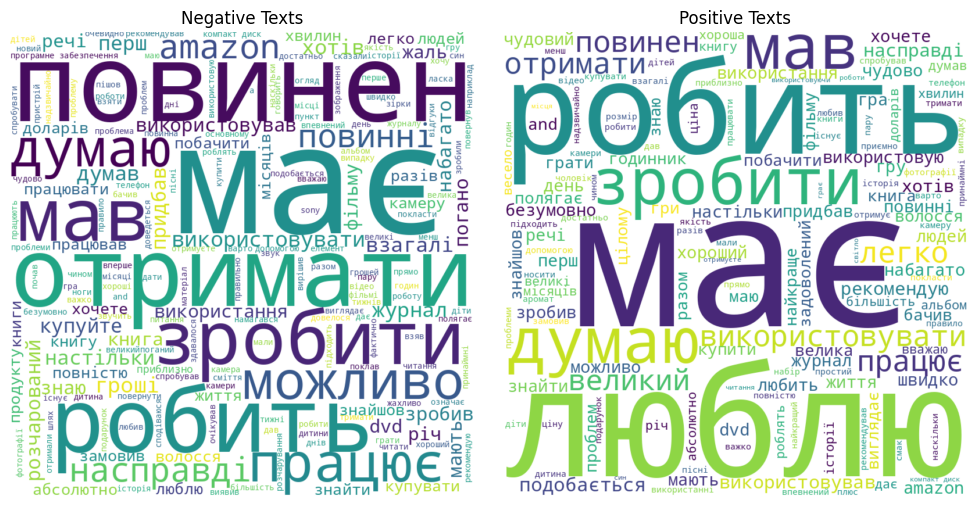

In [90]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

# Negative Texts Word Cloud
all_words = chain(*df[df["label"] == "neg"]["text-tokens"])
negative_wordcloud = wordcloud.generate(" ".join(all_words))

ax[0].imshow(negative_wordcloud, interpolation="bilinear")
ax[0].set_title("Negative Texts")
ax[0].axis("off")

# Positive Texts Word Cloud
all_words = chain(*df[df["label"] == "pos"]["text-tokens"])
positive_wordcloud = wordcloud.generate(" ".join(all_words))

ax[1].imshow(positive_wordcloud, interpolation="bilinear")
ax[1].set_title("Positive Texts")
ax[1].axis("off")

plt.tight_layout()
plt.show()